In [1]:
import numpy as np
import pandas as pd  
from IPython.display import display

In [2]:
all_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

display(all_data.head(n=1))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [3]:
labels=all_data['Churn']
raw_data=all_data
raw_data=raw_data.drop(['Churn'], axis=1)
raw_data=raw_data.drop(['customerID'], axis=1)
display(raw_data.head(n=1))
#print(labels)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


Maximum Monthly Charges: 118.75
Minimum Monthly Charges: 18.25


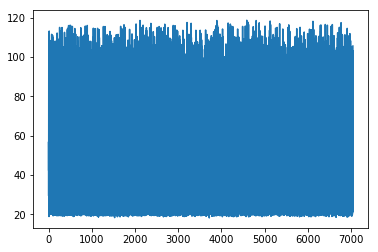

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

customer=[]
for i in range(len(all_data)):
    customer.append(i)
plt.plot(customer, raw_data['MonthlyCharges'], label='Customer vs Monthly Charges')
print('Maximum Monthly Charges:', max(raw_data['MonthlyCharges']))
print('Minimum Monthly Charges:', min(raw_data['MonthlyCharges']))



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


sub 100 Total Charges:  824
sub 1000 Total Charges:  2080
sub 10000 Total Charges:  4139
count Total Charges:  7043
Maximum Total Charges: 8684.8
Minimum Total Charges: 0.0


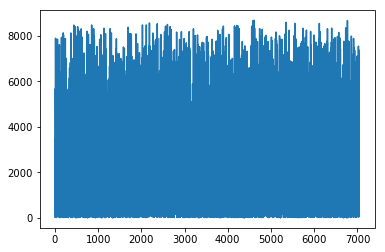

In [5]:
display(raw_data.head(n=1))

#print(float(raw_data['TotalCharges'][6670]))

#if tenure is 0 (they haven't paid 1 month yet), set the total charges column to 0 (from blank)
for i in range(len(raw_data)):
    value=raw_data['tenure'][i] #float(raw_data['tenure'][i])
    if value==0:
        #print('i', i)
        raw_data.set_value(i, 'TotalCharges', float(0))#['TotalCharges'][i]=int(0)
        #print('charges: ', raw_data['TotalCharges'][i])
        #rows changed 488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754


#convert values in TotalCharges to floating point numbers        
for i in range(len(raw_data)):
    raw_data.set_value(i, 'TotalCharges', float(raw_data['TotalCharges'][i]))
    raw_data.set_value(i, 'tenure', float(raw_data['tenure'][i]))
    raw_data.set_value(i, 'MonthlyCharges', float(raw_data['MonthlyCharges'][i]))

count_sub100=0
count_sub1000=0
count_sub10000=0
for i in range(len(raw_data)):
    if raw_data['TotalCharges'][i]<100:
        count_sub100+=1
    elif raw_data['TotalCharges'][i]<1000:
        count_sub1000+=1
    else:
        count_sub10000+=1
        
print ('sub 100 Total Charges: ', count_sub100)
print ('sub 1000 Total Charges: ', count_sub1000)
print ('sub 10000 Total Charges: ', count_sub10000)
print ('count Total Charges: ', len(raw_data))
    
plt.plot(customer, raw_data['TotalCharges'], label='Customer vs Total Charges')
print('Maximum Total Charges:', max(raw_data['TotalCharges']))
print('Minimum Total Charges:', min(raw_data['TotalCharges']))

Maximum Monthly Charges: 72
Minimum Monthly Charges: 0


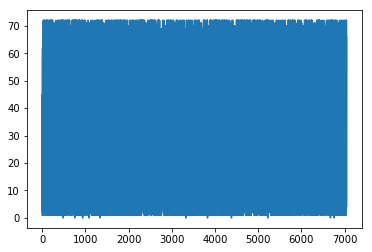

In [6]:
plt.plot(customer, raw_data['tenure'], label='Customer vs Tenure')
print('Maximum Monthly Charges:', max(raw_data['tenure']))
print('Minimum Monthly Charges:', min(raw_data['tenure']))

In [7]:
#normallizing data:
from sklearn.preprocessing import MinMaxScaler

normallized_data=raw_data
for i in range(len(raw_data)):
    normallized_data.set_value(i, 'TotalCharges', np.log(float(normallized_data['TotalCharges'][i])+1.0))

scaler=MinMaxScaler()


sets=['tenure','MonthlyCharges', 'TotalCharges']
#sets=['tenure']
normallized_data[sets]=scaler.fit_transform(normallized_data[sets])

#sets=['MonthlyCharges']
#normallized_data[sets]=scaler.fit_transform(normallized_data[sets])

#sets=['TotalCharges']
#normallized_data[sets]=scaler.fit_transform(normallized_data[sets])

display(normallized_data.head(n=1))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.378098


In [8]:
#One Hot Encoding:
label_final=pd.get_dummies(labels)
display(label_final.head(n=3))

normallized_data_final=pd.get_dummies(normallized_data)
display(normallized_data_final.head(n=3))


,No,Yes
0,1,0
1,1,0
2,0,1


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.115423,0.378098,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.472222,0.385075,0.831870,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0.027778,0.354229,0.517421,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [45]:
#Splitting the data into training and testing data for the Random Forest
from sklearn.model_selection import train_test_split
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(normallized_data_final, label_final, test_size=0.2, random_state=42)


In [13]:
#Running the Random Forest (Grid Search):
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer
from sklearn import grid_search
import pickle

n_estimators=[1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]
max_depth=[None, 5, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]
min_samples_split=[2, 5, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]
print(len(n_estimators), len(max_depth), len(min_samples_split))

#n_estimators=[90]
#max_depth=[10]
#min_samples_split=[20]


Score_RF=np.zeros((len(n_estimators),len(max_depth), len(min_samples_split), 5))
for i in range(len(n_estimators)):
    for j in range(len(max_depth)):
        for k in range(len(min_samples_split)):
            RandomForest=RandomForestClassifier(n_estimators=n_estimators[i], max_depth=max_depth[j], 
                                                min_samples_split=min_samples_split[k])
            RandomForest.fit(X_train_RF, y_train_RF['Yes'])
            Score_RF[i][j][k]=[n_estimators[i], max_depth[j], min_samples_split[k],
                         accuracy_score(y_test_RF['Yes'], RandomForest.predict(X_test_RF)),
                         fbeta_score(y_test_RF['Yes'], RandomForest.predict(X_test_RF), 0.5)]
            print(i, j, k)

#saving multiple runs:            
RFSscoreFormatted=[]
for i in range(len(Score_RF)):
    for j in range(len(Score_RF[i])):
        for k in range(len(Score_RF[i][j])):
            RFSscoreFormatted.append(Score_RF[i][j][k])  
            
np.savetxt('RFScoreFormatted.txt', RFSscoreFormatted, delimiter=',')
print('saved')

#saving one run:
RandomForestfile='RandomForestModel.sav'
pickle.dump(RandomForest, open(RandomForestfile, 'wb'))

print(Score_RF)               

16 17 17
0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 0 10
0 0 11
0 0 12
0 0 13
0 0 14
0 0 15
0 0 16
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 1 10
0 1 11
0 1 12
0 1 13
0 1 14
0 1 15
0 1 16
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 2 10
0 2 11
0 2 12
0 2 13
0 2 14
0 2 15
0 2 16
0 3 0
0 3 1
0 3 2
0 3 3
0 3 4
0 3 5
0 3 6
0 3 7
0 3 8
0 3 9
0 3 10
0 3 11
0 3 12
0 3 13
0 3 14
0 3 15
0 3 16
0 4 0
0 4 1
0 4 2
0 4 3
0 4 4
0 4 5
0 4 6
0 4 7
0 4 8
0 4 9
0 4 10
0 4 11
0 4 12
0 4 13
0 4 14
0 4 15
0 4 16
0 5 0
0 5 1
0 5 2
0 5 3
0 5 4
0 5 5
0 5 6
0 5 7
0 5 8
0 5 9
0 5 10
0 5 11
0 5 12
0 5 13
0 5 14
0 5 15
0 5 16
0 6 0
0 6 1
0 6 2
0 6 3
0 6 4
0 6 5
0 6 6
0 6 7
0 6 8
0 6 9
0 6 10
0 6 11
0 6 12
0 6 13
0 6 14
0 6 15
0 6 16
0 7 0
0 7 1
0 7 2
0 7 3
0 7 4
0 7 5
0 7 6
0 7 7
0 7 8
0 7 9
0 7 10
0 7 11
0 7 12
0 7 13
0 7 14
0 7 15
0 7 16
0 8 0
0 8 1
0 8 2
0 8 3
0 8 4
0 8 5
0 8 6
0 8 7
0 8 8
0 8 9
0 8 10
0 8 11
0 8 12
0 8 13
0 8 14
0 8 15
0 8 16
0 9 0
0 9 

In [50]:
#Running the Random Forest (Final Model) :
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, fbeta_score, make_scorer
from sklearn import grid_search
import pickle

#Model parameters
n_estimators=10
max_depth=None
min_samples_split=80

#Classifier
RandomForest=RandomForestClassifier(n_estimators=n_estimators, 
                                    max_depth=max_depth, min_samples_split=min_samples_split)

#Training the Model
RandomForest.fit(X_train_RF, y_train_RF['Yes'])

print(n_estimators, max_depth, min_samples_split,
      accuracy_score(y_test_RF['Yes'], RandomForest.predict(X_test_RF)),
      fbeta_score(y_test_RF['Yes'], RandomForest.predict(X_test_RF), 0.5))

#Saving the Model:
RandomForestfile='RandomForestModel.sav'
pickle.dump(RandomForest, open(RandomForestfile, 'wb')) 

10 None 80 0.8069552874378992 0.63875088715401


In [41]:
#print (X_train)


from sklearn.model_selection import train_test_split
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(normallized_data_final, label_final, test_size=0.999, random_state=42)
X_test_NN, X_val_NN, y_test_NN, y_val_NN = train_test_split(X_test_NN, y_test_NN, test_size=0.5, random_state=42)



X_trainNP=np.array(X_train_NN)
y_trainNP=np.array(y_train_NN)
X_valNP=np.array(X_val_NN)
y_valNP=np.array(y_val_NN)
X_testNP=np.array(X_test_NN)
y_testNP=np.array(y_test_NN)



In [71]:
#neural network:
from keras.layers import Dropout, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping  
from sklearn.metrics import accuracy_score, fbeta_score


#Network Shape Inputs:
size=[128, 256, 2]
act=['', 'elu','sigmoid']
drop=[0.3, 0.3]

#Building the Network:
Prime_model = Sequential()
Prime_model.add(Dense(size[0], input_shape=(X_train_NN.shape[1],)))
Prime_model.add(Dropout(drop[0]))
    
for i in range(len(size)-2):
    Prime_model.add(Dense(size[i+1], activation=act[i+1]))
    Prime_model.add(Dropout(drop[i+1]))
        
Prime_model.add(Dense(size[-1], activation=act[-1]))
#Prime_model.summary()    


#compiling the Network:
Prime_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#Training the Network:
epochs = 30

Stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=1, mode='auto')
Saving=ModelCheckpoint(filepath='G:\Machine Learning\weightsdense.best.from_scratch.hdf5',
                       monitor='val_loss', verbose=1, save_best_only=True)


Prime_model.fit(X_trainNP, y_trainNP, 
          validation_data=(X_valNP, y_valNP),
          epochs=epochs, batch_size=7, callbacks=[Stopping, Saving])



#Evaluating the results:
Prime_model.load_weights('G:\Machine Learning\weightsdense.best.from_scratch.hdf5')

y_pred=np.zeros((len(X_testNP),1))

for i in range(len(X_testNP)):
    temp=Prime_model.predict(np.array([X_testNP[i]]))
    temp+=0.5
    if temp[0][0]>temp[0][1]:
        y_pred[i]=0
    else:
        y_pred[i]=1
        
        
print ('accuracy: ', accuracy_score(y_test_NN['Yes'], y_pred))
print ('f-score: ', fbeta_score(y_test_NN['Yes'], y_pred, 0.5))

Train on 7 samples, validate on 3518 samples
Epoch 1/30
Epoch 00000: val_loss improved from inf to 0.61068, saving model to G:\Machine Learning\weightsdense.best.from_scratch.hdf5
7/7 [==============================] - 3s - loss: 0.6928 - acc: 0.5000 - val_loss: 0.6107 - val_acc: 0.6561
Epoch 2/30
Epoch 00001: val_loss improved from 0.61068 to 0.57650, saving model to G:\Machine Learning\weightsdense.best.from_scratch.hdf5
7/7 [==============================] - 1s - loss: 0.4536 - acc: 0.8571 - val_loss: 0.5765 - val_acc: 0.6789
Epoch 3/30
Epoch 00002: val_loss did not improve
7/7 [==============================] - 1s - loss: 0.4582 - acc: 0.7857 - val_loss: 0.6276 - val_acc: 0.6465
Epoch 4/30
Epoch 00003: val_loss did not improve
7/7 [==============================] - 1s - loss: 0.3003 - acc: 0.9286 - val_loss: 0.6132 - val_acc: 0.6578
Epoch 5/30
Epoch 00004: val_loss did not improve
7/7 [==============================] - 1s - loss: 0.2402 - acc: 1.0000 - val_loss: 0.6568 - val_acc: 0

In [32]:
#Evaluating the results:
Prime_model.load_weights('G:\Machine Learning\weightsdense.best.from_scratch.hdf5')

y_pred=np.zeros((len(X_testNP),1))

for i in range(len(X_testNP)):
    temp=Prime_model.predict(np.array([X_testNP[i]]))
    temp+=0.5
    if temp[0][0]>temp[0][1]:
        y_pred[i]=0
    else:
        y_pred[i]=1
        
        
print ('accuracy: ', accuracy_score(y_test_NN['Yes'], y_pred))
print ('f-score: ', fbeta_score(y_test_NN['Yes'], y_pred, 0.5))


accuracy:  0.8176011355571328
f-score:  0.6617172369270498


In [19]:
#Benchmark:
from sklearn.metrics import accuracy_score, fbeta_score

guess_noChurn=np.zeros((len(y_test['Yes']),1))

print ('accuracy (no churn): ', accuracy_score(y_test['Yes'], guess_noChurn))
print ('f-score (no churn): ', fbeta_score(y_test['Yes'], guess_noChurn, 0.5))

guess_Churn=np.ones((len(y_test['Yes']),1))

print ('accuracy (churn): ', accuracy_score(y_test['Yes'], guess_Churn))
print ('f-score (churn): ', fbeta_score(y_test['Yes'], guess_Churn, 0.5))

accuracy (no churn):  0.734208658623137
f-score (no churn):  0.0
accuracy (churn):  0.265791341376863
f-score (churn):  0.31153814158555854


G:\Anaconda\envs\icebergChallenge\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Cite:
https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas

https://stackoverflow.com/questions/379906/how-do-i-parse-a-string-to-a-float-or-int-in-python

https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

https://stackoverflow.com/questions/33564181/keras-gru-nn-keyerror-when-fitting-not-in-index

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html

chollet2015keras,Keras, 2015, {https://keras.io}

https://stackoverflow.com/questions/37293642/how-to-tell-keras-stop-training-based-on-loss-value

